# QSAR Aquatic Toxicity

## Source:

- Davide Ballabio (davide.ballabio '@' unimib.it), Matteo Cassotti, Viviana Consonni, Roberto Todeschini, Milano Chemometrics and QSAR Research Group (http://www.michem.unimib.it/), UniversitÃ  degli Studi Milano - Bicocca, Milano (Italy)

## Data Set Information:

- This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. to predict acute aquatic toxicity towards Daphnia Magna. LC50 data, which is the concentration that causes death in 50% of test D. magna over a test duration of 48 hours, was used as model response. The model comprised 8 molecular descriptors: TPSA(Tot) (Molecular properties), SAacc (Molecular properties), H-050 (Atom-centred fragments), MLOGP (Molecular properties), RDCHI (Connectivity indices), GATS1p (2D autocorrelations), nN (Constitutional indices), C-040 (Atom-centred fragments). Details can be found in the quoted reference: M. Cassotti, D. Ballabio, V. Consonni, A. Mauri, I. V. Tetko, R. Todeschini (2014). Prediction of acute aquatic toxicity towards daphnia magna using GA-kNN method, Alternatives to Laboratory Animals (ATLA), 42,31:41; doi: 10.1177/026119291404200106



## Attribute Information:

- 8 molecular descriptors and 1 quantitative experimental response:
    - 1) TPSA(Tot)
    - 2) SAacc
    - 3) H-050
    - 4) MLOGP
    - 5) RDCHI
    - 6) GATS1p
    - 7) nN
    - 8) C-040
    - 9) quantitative response, LC50 [-LOG(mol/L)]

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [243]:
columns = ['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', "RDCHI", "GATS1p", "nN", "C-040", "LC50"] 

df0 = pd.read_csv("qsar_aquatic_toxicity.csv", sep = ";", names = columns)
df = df0.copy()

df.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
0,0.000,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.000,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.230,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.230,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.230,11.000,0,4.068,2.758,0.695,0,0,5.979


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TPSA(Tot)  546 non-null    float64
 1   SAacc      546 non-null    float64
 2   H-050      546 non-null    int64  
 3   MLOGP      546 non-null    float64
 4   RDCHI      546 non-null    float64
 5   GATS1p     546 non-null    float64
 6   nN         546 non-null    int64  
 7   C-040      546 non-null    int64  
 8   LC50       546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


In [4]:
df.describe()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
count,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000
mean,48.473,58.869,0.938,2.313,2.492,1.046,1.004,0.353,4.658
std,46.764,68.167,1.619,1.742,0.811,0.404,1.397,0.807,1.665
min,0.000,0.000,0.000,-6.446,1.000,0.281,0.000,0.000,0.122
25%,15.790,11.000,0.000,1.232,1.975,0.737,0.000,0.000,3.602
50%,40.460,42.683,0.000,2.274,2.344,1.020,1.000,0.000,4.516
75%,70.023,77.493,1.000,3.393,2.911,1.266,2.000,0.000,5.607
max,347.320,571.952,18.000,9.148,6.439,2.500,11.000,11.000,10.047


In [5]:
# TPSA(Tot), SAacc, H-050, nN, C-040 feature larinda outlier ihtimali var.

In [6]:
df["TPSA(Tot)"].value_counts().sort_index(ascending = False)

347.320     1
336.430     1
278.800     1
237.750     1
215.340     1
           ..
12.030      7
9.230      11
7.760       2
3.240       4
0.000      97
Name: TPSA(Tot), Length: 227, dtype: int64

In [7]:
df["SAacc"].value_counts().sort_index()

0.000      108
3.124        4
6.249        6
6.922        1
9.507        2
          ... 
332.830      1
358.244      1
413.191      1
551.098      1
571.952      1
Name: SAacc, Length: 210, dtype: int64

In [8]:
df["H-050"].value_counts()

0     296
1     121
2      76
3      23
4      15
5       6
6       4
7       2
8       1
16      1
18      1
Name: H-050, dtype: int64

In [9]:
df["nN"].value_counts()

0     271
1     131
2      79
3      35
5      12
4      11
6       3
7       3
11      1
Name: nN, dtype: int64

In [10]:
df["C-040"].value_counts()

0     412
1      92
2      36
4       3
3       2
11      1
Name: C-040, dtype: int64

In [11]:
df["C-040"].value_counts()

0     412
1      92
2      36
4       3
3       2
11      1
Name: C-040, dtype: int64

In [12]:
df["C-040"] = df["C-040"][df["C-040"] < 3]

In [13]:
df["C-040"].value_counts()

0.000    412
1.000     92
2.000     36
Name: C-040, dtype: int64

In [14]:
outliers = ["TPSA(Tot)", "SAacc", "H-050", "nN" ]

for i in outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
   
    IQR = Q3 - Q1
    
    df[i] = df[i][~((df[i]> (Q3 + 1.5 * IQR))| (df[i] < (Q1 - 1.5 * IQR)))]

In [15]:
df.dropna(inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 545
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TPSA(Tot)  486 non-null    float64
 1   SAacc      486 non-null    float64
 2   H-050      486 non-null    float64
 3   MLOGP      486 non-null    float64
 4   RDCHI      486 non-null    float64
 5   GATS1p     486 non-null    float64
 6   nN         486 non-null    float64
 7   C-040      486 non-null    float64
 8   LC50       486 non-null    float64
dtypes: float64(9)
memory usage: 38.0 KB


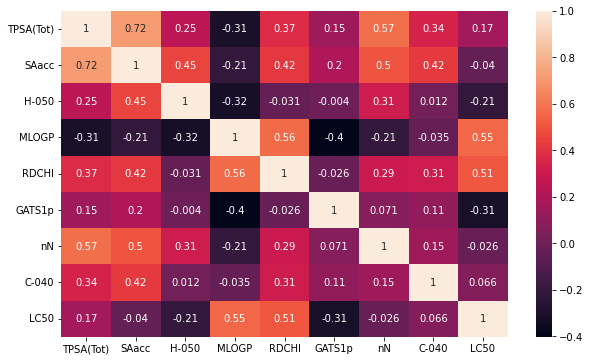

In [17]:
sns.heatmap(df.corr(), annot = True);

In [18]:
corr_by_LC50 = df.corr()["LC50"].sort_values()[:-1]
corr_by_LC50

GATS1p      -0.315
H-050       -0.213
SAacc       -0.040
nN          -0.026
C-040        0.066
TPSA(Tot)    0.166
RDCHI        0.506
MLOGP        0.552
Name: LC50, dtype: float64

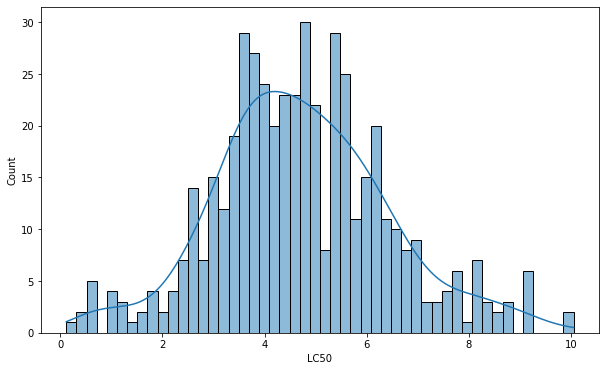

In [19]:
sns.histplot(df.LC50, bins = 50, kde=True);

In [244]:
X = df.drop(columns = ["LC50"])
y = df["LC50"]

<hr>

## Train | Test Split

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state=42)


In [247]:
print("Train features shape :", X_train.shape)
print("Train features shape :", y_train.shape)
print("Test features shape :", X_test.shape)
print("Test features shape :", y_test.shape)

Train features shape : (480, 8)
Train features shape : (480,)
Test features shape : (66, 8)
Test features shape : (66,)


In [248]:
noise = np.random.uniform(0, 10, size=(X.shape[0], 10))

x = X.values

<hr>

# Linear Regression

In [65]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [68]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.504,0.578
mae,0.903,0.853
mse,1.434,1.292
rmse,1.197,1.137


In [69]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [70]:
pd.DataFrame(scores).iloc[:, 2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.510,-0.996,-1.659,-1.288
1,0.515,-1.038,-1.809,-1.345
2,0.518,-0.810,-1.131,-1.064
3,0.543,-0.851,-1.427,-1.195
4,0.493,-0.932,-1.630,-1.277
5,0.449,-0.732,-0.924,-0.961
6,0.300,-0.940,-1.858,-1.363
7,0.439,-0.858,-1.117,-1.057
8,0.511,-0.883,-1.515,-1.231
9,0.493,-1.130,-1.720,-1.311


In [71]:
pd.DataFrame(scores).iloc[:, 2:].mean() 

test_r2                             0.477
test_neg_mean_absolute_error       -0.917
test_neg_mean_squared_error        -1.479
test_neg_root_mean_squared_error   -1.209
dtype: float64

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lm_R2

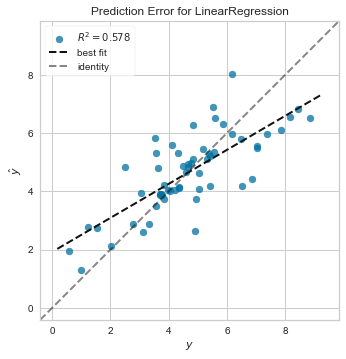

In [72]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

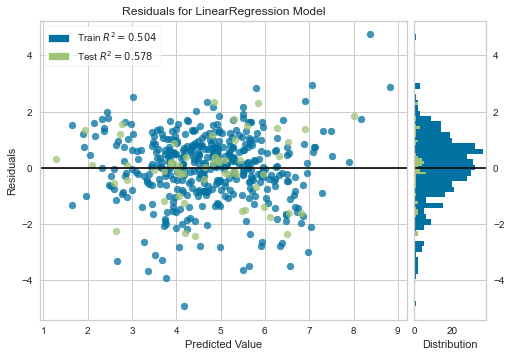

In [73]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

<hr>

### > Scaling
- Burada pipeline kullanmadan hızlı bi şekilde ridge, lasso ve elastic net e bakmak istedim. 

In [74]:
scaler = StandardScaler()

In [75]:
X_train = scaler.fit_transform(X_train)

In [76]:
X_test = scaler.transform(X_test)

# Ridge 

In [77]:
X_train = scaler.fit_transform(X_train)

In [78]:
from sklearn.linear_model import Ridge, RidgeCV

In [79]:
X_test = scaler.transform(X_test)

In [80]:
ridge_model = Ridge()

In [81]:
ridge_model.fit(X_train, y_train)

Ridge()

In [82]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.504,0.577
mae,0.904,0.854
mse,1.434,1.293
rmse,1.197,1.137


In [83]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [84]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')

In [85]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [86]:
ridge_cv_model.alpha_

1.0

In [87]:
train_val(ridge_cv_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.504,0.577
mae,0.904,0.854
mse,1.434,1.293
rmse,1.197,1.137


<hr>

# Lasso 

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [191]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [192]:
y_train_pred = lasso_model.predict(X_train)

In [193]:
y_pred = lasso_model.predict(X_test)

In [194]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.298,0.278
mae,1.080,1.029
mse,1.959,1.885
rmse,1.400,1.373


In [195]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train, y_train)

In [196]:
lasso_cv_model.alpha_

0.02

In [55]:
y_train_pred = lasso_cv_model.predict(X_train)

In [56]:
y_pred = lasso_cv_model.predict(X_test)

In [57]:
train_val_ls = train_val(lasso_cv_model, X_train, y_train, X_test, y_test)
train_val_ls.columns = ["lasso_train", "lasso_test"]
train_val_ls

,lasso_train,lasso_test
R2,0.504,0.578
mae,0.905,0.855
mse,1.435,1.290
rmse,1.198,1.136


### > Genetic Algorithm for Feature Selection

In [58]:
#pip install sklearn-genetic-opt

In [250]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [303]:
clf = Lasso(alpha = 0.02)

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=10,
    scoring="r2",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

In [304]:
evolved_estimator.fit(X, y)
features = evolved_estimator.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.120234	0.174629   	0.364618   	-0.147688  
1  	60    	0.271941	0.103878   	0.373367   	-0.0531412 
2  	60    	0.335927	0.0325713  	0.373367   	0.248298   
3  	60    	0.354635	0.0257015  	0.375804   	0.312021   
4  	60    	0.374101	0.00128915 	0.37831    	0.373367   
5  	60    	0.375185	0.00205804 	0.381312   	0.373367   
6  	60    	0.376496	0.001735   	0.381312   	0.373367   
7  	60    	0.377909	0.00118123 	0.381312   	0.375804   
8  	60    	0.37861 	0.000900689	0.381312   	0.37831    
9  	60    	0.37891 	0.00120092 	0.381312   	0.37831    
10 	60    	0.379911	0.00149781 	0.381312   	0.37831    
11 	60    	0.380912	0.00102058 	0.381312   	0.37831    
12 	60    	0.381212	0.000538929	0.381312   	0.37831    
13 	60    	0.379299	0.0108408  	0.381312   	0.32092    
14 	60    	0.381312	1.66533e-16	0.381312   	0.381312   
15 	60    	0.381312	1.66533e-16	0.381312   	0.381312   
16 	60    	0.381312	1.66533e-16	0.381312   	0.38

In [305]:
features 

array([ True,  True, False,  True,  True,  True,  True, False])

In [306]:
# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test.iloc[:, features])
#accuracy = accuracy_score(y_test, y_predict_ga)

ga_scores = {"ga_scores":{"R2" : r2_score(y_test, y_predict_ga),
    "mae" : mean_absolute_error(y_test, y_predict_ga),
    "mse" : mean_squared_error(y_test, y_predict_ga),                          
    "rmse" : np.sqrt(mean_squared_error(y_test, y_predict_ga))}}
pd.DataFrame(scores)

,ga_scores
R2,0.461
mae,0.840
mse,1.407
rmse,1.186


In [307]:
print(evolved_estimator.best_features_)
print("accuracy score: ", "{:.2f}".format(rmse))

[ True  True False  True  True  True  True False]
accuracy score:  1.19


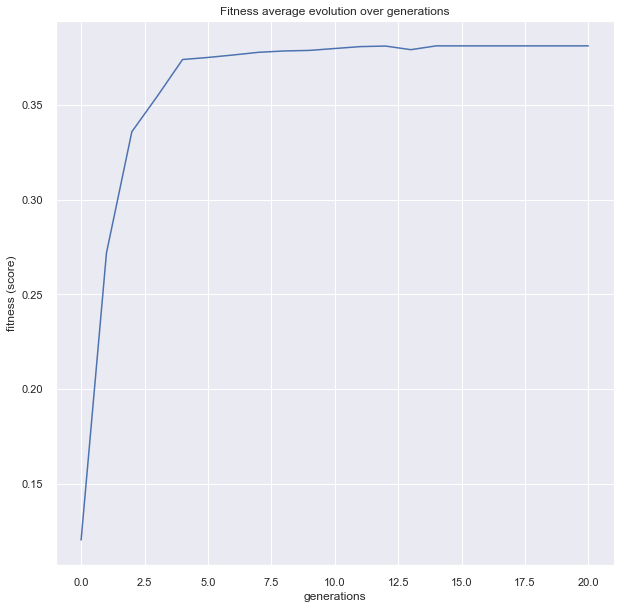

In [308]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

<hr>

# Elastic-Net

In [321]:
from sklearn.linear_model import ElasticNet

In [322]:
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

ElasticNet()

In [323]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.378,0.353
mae,1.013,0.948
mse,1.733,1.690
rmse,1.317,1.300


### > Finding best alpha and l1_ratio for ElasticNet

In [324]:
from sklearn.model_selection import GridSearchCV

In [325]:
elastic_model = ElasticNet()

In [326]:
param_grid = {'alpha':[1, 2.03, 3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [327]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)     # n_jobs = -1, tüm işemcileri (cpu core larını) kulanmak için

In [65]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 2.03, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [66]:
grid_model.best_estimator_

ElasticNet(alpha=1)

In [67]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.195,0.210
mae,1.189,1.186
mse,2.327,2.416
rmse,1.525,1.554


<hr>

- Yukarıda linear regression ve multicollinearity vb. diger karşımıza çıkabilecek olan sorunları ridge, lasso ve elastik net ile yeniden model kurarak denedik. En iyi sonuçları lasso ile aldıgımız için feature importance i lasso üzerinden oluşturduk.

### > Feature İmportance

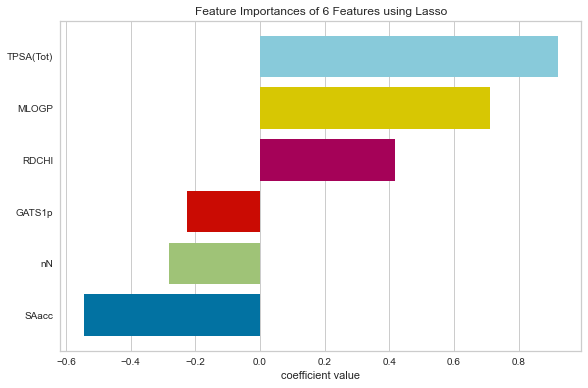

In [68]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=0.01), labels=df.drop(columns=['LC50', "H-050", "C-040"]).columns, relative = False)
visualizer = RadViz(size=(600,400))
viz.fit(X_train, y_train)
viz.show();

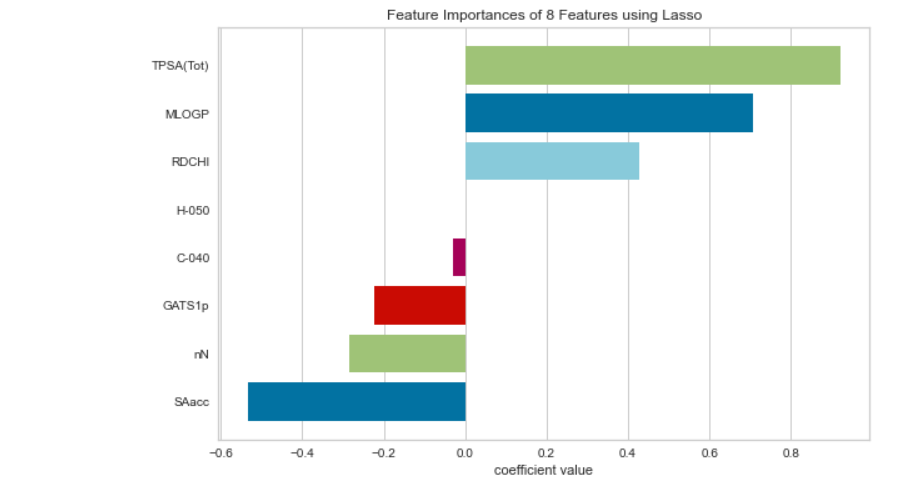

<hr>

# RandomForest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
operations = [("scaler", StandardScaler()), ("rf", RandomForestRegressor())]

In [69]:
pipe_model = Pipeline(steps=operations)

In [70]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

In [71]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [72]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.938,0.612
mae,0.306,0.819
mse,0.178,1.187
rmse,0.422,1.089


### > Cross Validation

In [73]:
operations = [('scaler',StandardScaler()),('rf', RandomForestRegressor())]
model = Pipeline(operations)  # yukarıda predict işlemi yapıldıgı için leakage olmasın diye modeli yeniden kurduk.

scores = cross_validate(model, X_train, y_train, scoring = ['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_r2                             0.523
test_neg_mean_absolute_error       -0.853
test_neg_mean_squared_error        -1.383
test_neg_root_mean_squared_error   -1.159
dtype: float64

### > GridSearchCV

In [74]:
param_grid = {"rf__n_estimators":[100,300,500],
             "rf__max_depth":[3,5,7],
             "rf__max_features":[3,5],
             "rf__min_samples_split":[2,4,6]}

In [75]:
pipe_model = Pipeline(steps=operations)

In [76]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'neg_root_mean_squared_error', verbose = 2, n_jobs = -1)

In [77]:
pipe_grid.fit(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 7], 'rf__max_features': [3, 5],
                         'rf__min_samples_split': [2, 4, 6],
                         'rf__n_estimators': [100, 300, 500]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [78]:
pipe_grid.best_params_

{'rf__max_depth': 7,
 'rf__max_features': 3,
 'rf__min_samples_split': 4,
 'rf__n_estimators': 300}

In [79]:
train_val_rf = train_val(pipe_grid, X_train, y_train, X_test, y_test)
train_val_rf.columns = ["rf_train", "rf_test"]
train_val_rf

,rf_train,rf_test
R2,0.812,0.597
mae,0.576,0.827
mse,0.542,1.232
rmse,0.736,1.110


### > Feature Importance

In [80]:
operations = [("scaler", StandardScaler()), ("rf", RandomForestRegressor(max_depth= 7, max_features = 5, min_samples_split =  2, n_estimators = 300))]

In [81]:
pipe_model = Pipeline(steps=operations)

In [82]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=7, max_features=5,
                                       n_estimators=300))])

In [83]:
# vanilla rf ile gridsearchcv sonucu çok farklı olmadıgı için vanilla rf üzerinden f importance a baktık.
rf_feature_imp = pd.DataFrame(index = X.columns, data = pipe_model["rf"].feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
MLOGP,0.325
RDCHI,0.281
GATS1p,0.148
TPSA(Tot),0.131
SAacc,0.085
nN,0.030


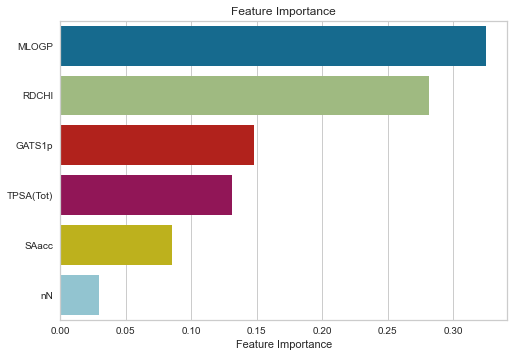

In [84]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show();

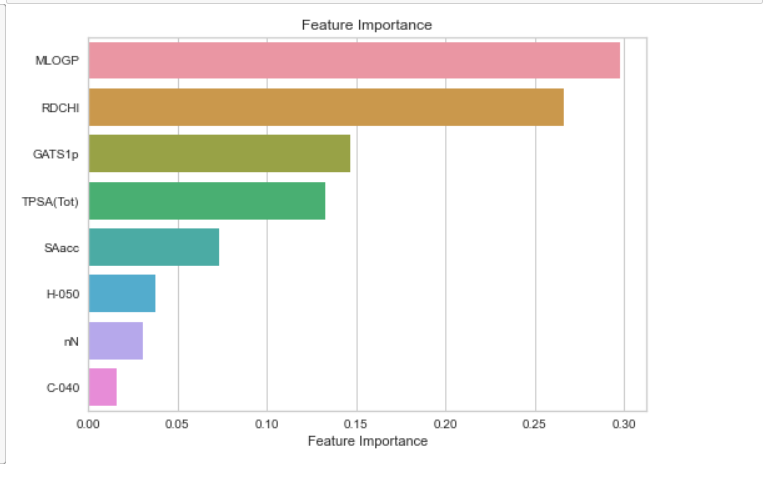

### > Genetic Algorithm for Feature Selection

In [309]:
clf = RandomForestRegressor(max_depth=7,n_estimators=300)

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=10,
    scoring="r2",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

<IPython.core.display.Javascript object>

In [310]:
evolved_estimator.fit(X, y)
features = evolved_estimator.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.209639	0.183038   	0.432683   	-0.24229   
1  	60    	0.328392	0.078544   	0.439413   	0.15468    
2  	60    	0.36916 	0.0475909  	0.439413   	0.270148   
3  	60    	0.404758	0.0340181  	0.439413   	0.352033   
4  	60    	0.430824	0.0135503  	0.439413   	0.364527   
5  	60    	0.435041	0.00375585 	0.442659   	0.426132   
6  	60    	0.437163	0.00311094 	0.442248   	0.427114   
7  	60    	0.438356	0.00242692 	0.442248   	0.433877   
8  	60    	0.440247	0.00210444 	0.443681   	0.433749   
9  	60    	0.44022 	0.00216785 	0.443265   	0.434427   
10 	60    	0.44142 	0.00169354 	0.444376   	0.436187   
11 	60    	0.441413	0.00199487 	0.444376   	0.435536   
12 	60    	0.441102	0.0026742  	0.444376   	0.434076   
13 	60    	0.440534	0.00252134 	0.444955   	0.435214   
14 	60    	0.441059	0.00258655 	0.444955   	0.43541    
15 	60    	0.441379	0.00296458 	0.446395   	0.433258   
16 	60    	0.440651	0.0044485  	0.447256   	0.43

In [311]:
features 

array([ True,  True, False,  True,  True, False, False, False])

In [312]:
# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test.iloc[:, features])

ga_scores = {"ga_scores":{"R2" : r2_score(y_test, y_predict_ga),
    "mae" : mean_absolute_error(y_test, y_predict_ga),
    "mse" : mean_squared_error(y_test, y_predict_ga),                          
    "rmse" : np.sqrt(mean_squared_error(y_test, y_predict_ga))}}
pd.DataFrame(scores)

,ga_scores
R2,0.461
mae,0.840
mse,1.407
rmse,1.186


In [313]:
print(evolved_estimator.best_features_)

[ True  True False  True  True False False False]
accuracy score:  1.19


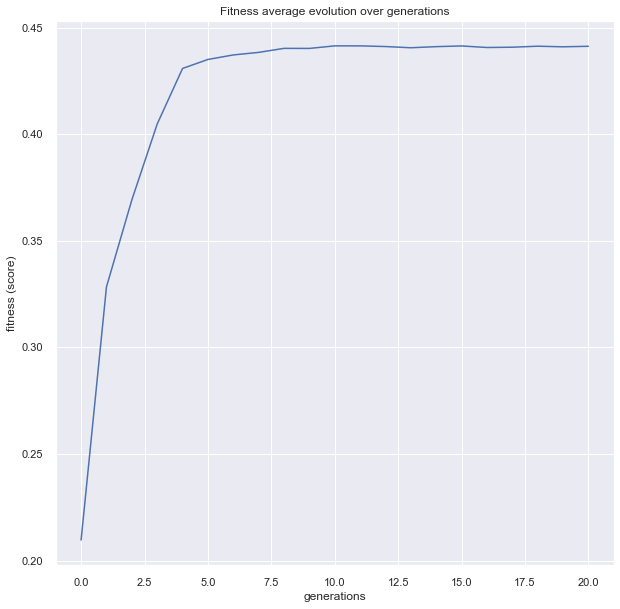

In [314]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()


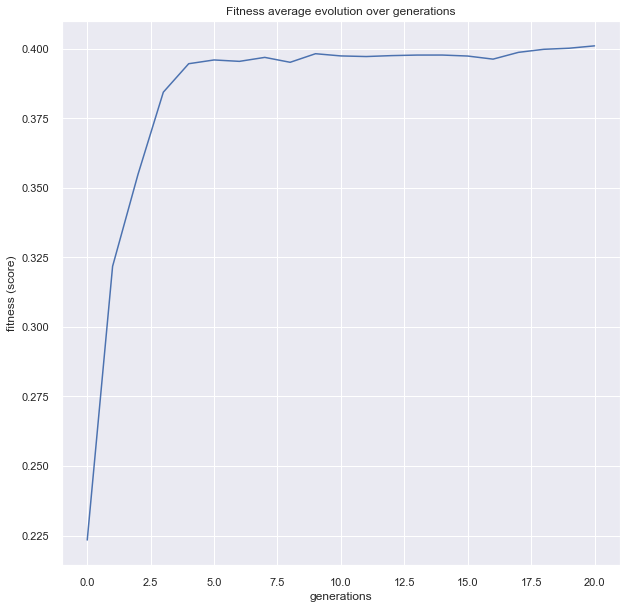

In [207]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()


<hr>

# KNN

In [85]:
# scale sart distance tabanlı oldugu için 

In [209]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsRegressor())]

In [88]:
pipe_model = Pipeline(steps=operations)

In [89]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [90]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [91]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.695,0.533
mae,0.675,0.875
mse,0.883,1.428
rmse,0.940,1.195


### > Cross Validation

In [92]:
operations = [('scaler',StandardScaler()),('knn', KNeighborsRegressor())]
model = Pipeline(operations)  # yukarıda predict işlemi yapıldıgı için leakage olmasın diye modeli yeniden kurduk.

scores = cross_validate(model, X_train, y_train, scoring = ['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_r2                             0.535
test_neg_mean_absolute_error       -0.831
test_neg_mean_squared_error        -1.335
test_neg_root_mean_squared_error   -1.139
dtype: float64

### > GridSearchCV

In [93]:
param_grid = {"knn__n_neighbors":np.arange(1,100,3),
            "knn__weights" : ["uniform", "distance"],
              "knn__algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
             }

In [94]:
pipe_model = Pipeline(steps=operations)

In [95]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'neg_root_mean_squared_error',verbose = 2, n_jobs = -1)

In [96]:
pipe_grid.fit(X_train,y_train)

Fitting 10 folds for each of 264 candidates, totalling 2640 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [97]:
pipe_grid.best_params_

{'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}

In [98]:
train_val_knn = train_val(pipe_grid, X_train, y_train, X_test, y_test)
train_val_knn.columns = ["knn_train", "knn_test"]
train_val_knn

,knn_train,knn_test
R2,0.999,0.567
mae,0.010,0.845
mse,0.003,1.325
rmse,0.058,1.151


### > Feature Importance

 - Knn distance tabanlı, non parametrik algoritmadır. Non parametrik algoritmalarda feature importance yoktur. Yani hangi parametre daha iyi hangi parametre daha kötü diye bir şey söyleyemeyiz.


### > Genetic Algorithm for Feature Selection

In [315]:
clf = KNeighborsRegressor(n_neighbors=10 ,weights = 'distance')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=10,
    scoring="r2",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

In [316]:
evolved_estimator.fit(X, y)
features = evolved_estimator.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.189207	0.134717   	0.309012   	-0.289005  
1  	60    	0.245964	0.025246   	0.309012   	0.188137   
2  	60    	0.270727	0.0286286  	0.309012   	0.236101   
3  	60    	0.288238	0.0237198  	0.309012   	0.239395   
4  	60    	0.306775	0.00844805 	0.309012   	0.271027   
5  	60    	0.309458	0.00240319 	0.322399   	0.309012   
6  	60    	0.310343	0.0116798  	0.322399   	0.255243   
7  	60    	0.317044	0.00655866 	0.322399   	0.309012   
8  	60    	0.321061	0.00401634 	0.322399   	0.309012   
9  	60    	0.322399	0          	0.322399   	0.322399   
10 	60    	0.322399	0          	0.322399   	0.322399   
11 	60    	0.322399	0          	0.322399   	0.322399   
12 	60    	0.321813	0.00315901 	0.322399   	0.304801   
13 	60    	0.322399	0          	0.322399   	0.322399   
14 	60    	0.322399	0          	0.322399   	0.322399   
15 	60    	0.321953	0.00240319 	0.322399   	0.309012   
16 	60    	0.322399	0          	0.322399   	0.32

In [317]:
features 

array([False, False,  True,  True,  True,  True,  True, False])

In [318]:
# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test.iloc[:, features])
#accuracy = accuracy_score(y_test, y_predict_ga)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_ga))

In [319]:
print(evolved_estimator.best_features_)
print("accuracy score: ", "{:.2f}".format(rmse))

[False False  True  True  True  True  True False]
accuracy score:  0.00


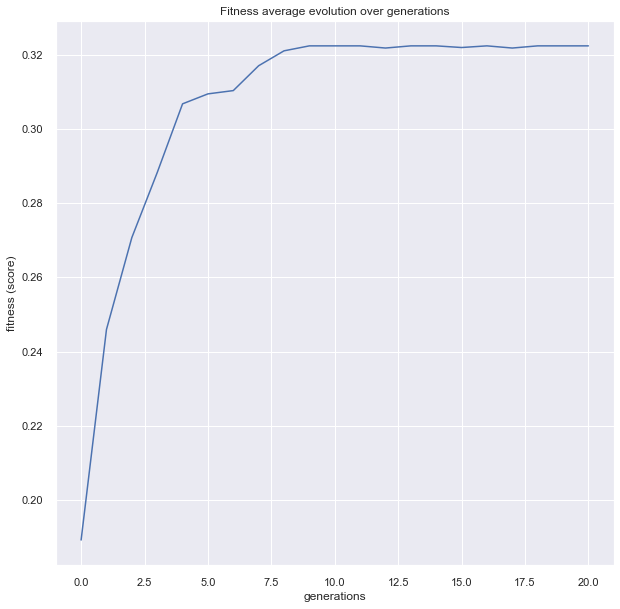

In [320]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

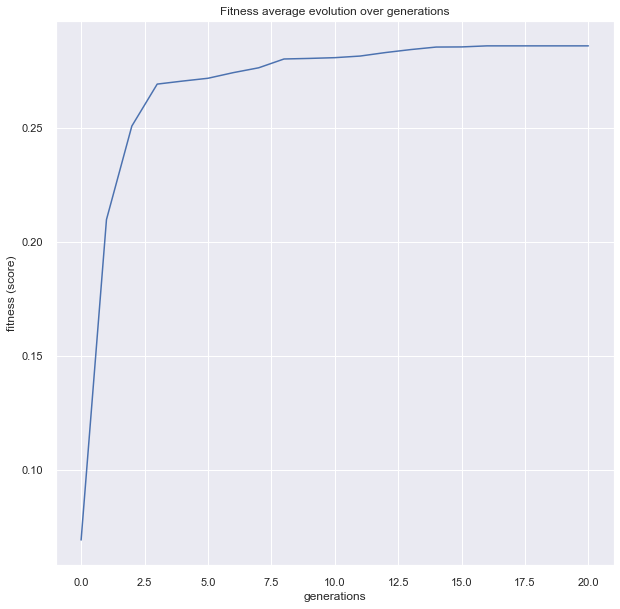

In [241]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()


<hr>

### > Result
- Yukarıdaki modeller incelendiginde genel olarak model başarısının düşük oldugunu gözlemliyoruz. Gerçek hayat projelerinde bu tarz durumlar yaygın olarak karşımıza çıkıyor. Benim domain bilgim bu çalışma özelinde yeterli olmadıgı için sonuçta elde ettigimiz başarı durumunun gerçek hayattaki karşılıgı ile degerlendirilmesi konusunda bi açıklama yapmamın dogru olmayacagını düşünüyorum. Lakin elimizdeki datayı arttırmamız durumunda model başarısı artacaktır. 

- Çalışma sırasında outlier ları atmanın model başarısında iyileştirmeye gittigini gözlemledigim için outlier olan verileri sildim.

- Pipeline kullanarak süreçleri otomatize hale getirip, data leakage i engellemiş oldum.

- Önce normal olarak tüm feature lar ile model başarıları test ettim. Elde ettigimiz feature importance ile "H-050", "C-040" featurelarını düşürerek modelleri yeniden çalıştırdım. Tüm feature ların başarı puanları ve feature importance grafiklerini görsel olarak ekledim.

In [99]:
pd.concat([train_val_ls, train_val_rf, train_val_knn], axis=1)

,lasso_train,lasso_test,rf_train,rf_test,knn_train,knn_test
R2,0.504,0.578,0.812,0.597,0.999,0.567
mae,0.905,0.855,0.576,0.827,0.010,0.845
mse,1.435,1.290,0.542,1.232,0.003,1.325
rmse,1.198,1.136,0.736,1.110,0.058,1.151


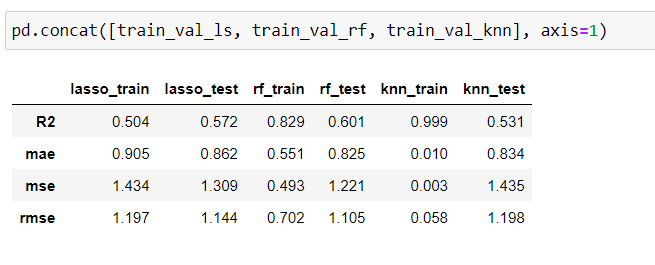

<hr>

## - <a href = "https://www.simonwenkel.com/2019/09/30/revisitingML-qsar-aquatic-toxicity.html">Other Resource</a>
- Lütfen bu çalışmaya göz atın.

## - <a href = "https://sklearn-genetic-opt.readthedocs.io/en/stable/index.html">GA feature selection</a>

## Relevant Papers:

M. Cassotti, D. Ballabio, V. Consonni, A. Mauri, I. V. Tetko, R. Todeschini (2014). Prediction of acute aquatic toxicity towards daphnia magna using GA-kNN method, Alternatives to Laboratory Animals (ATLA), 42,31:41; doi: 10.1177/026119291404200106

